# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Utility import Utility
from FactorAnalyzer import FactorAnalyzer
from DataExplorer import DataExplorer

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%load_ext autoreload
%autoreload 2
%matplotlib inline

help(DataExplorer)

Help on class DataExplorer in module DataExplorer:

class DataExplorer(builtins.object)
 |  Methods defined here:
 |  
 |  boxplot(self, xcol, ycol, data)
 |      xcol, ycol: string, column name
 |      Box plot
 |  
 |  categorical_plot(self, data, category, func=None, value=None)
 |      category: category column name (x axis)
 |      func: (Default None) count the number of different categories; (func: )max, mean, sum...
 |      value: when func is NOT None, should specify value (column name) to calculate (y axis).
 |  
 |  catplot(self, x, hue, col, data)
 |      x: value to count
 |      hue: color category
 |      col: type category
 |      
 |      Plot the count of categories
 |  
 |  chi_2_test(self, df, column_A, column_B)
 |      Chi-square test of independence of categorical column A and column B of the dataframe df.
 |  
 |  correlation_analysis(self, df, cols=None, pairplot=False)
 |      Visualize correlation between columns 
 |      Correlation pair plot between highest

In [2]:
d = DataExplorer()
u = Utility()
f = FactorAnalyzer()

# Load data

### Get data from a folder

In [223]:
dict_pd = d.load_data_from_folder("data/")
print(dict_pd.keys())

Filename: crime , loaded with encoding: cp1252
Shape: (319073, 17)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.3578,-71.1394,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.3068,-71.0603,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.3466,-71.0724,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.3342,-71.0787,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.2754,-71.0904,"(42.27536542, -71.09036101)"


Filename: [Real]311_Service , loaded with encoding: utf-8
Shape: (364558, 53)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0000,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0000,254678.0000,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,40.8657,-73.9235,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0000,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0000,221986.0000,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,40.7759,-73.9151,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0000,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0000,256380.0000,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,40.8703,-73.8885,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0000,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0000,243899.0000,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,40.8360,-73.8284,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0000,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0000,206375.0000,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,40.7331,-73.8742,"(40.733059618956815, -73.87416975810375)"


Filename: airbnb , loaded with encoding: utf-8
Shape: (74111, 29)


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.0106,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0000,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.6965,-73.9916,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0000,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0000,1.0000
1,6304928,5.1299,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0000,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.7661,-73.9890,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0000,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0000,3.0000
2,7919400,4.9767,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0000,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.8081,-73.9438,The Garden Oasis,Harlem,10,92.0000,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0000,3.0000
3,13418779,6.6201,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0000,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.7720,-122.4316,Beautiful Flat in the Heart of SF!,Lower Haight,0,nan,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0000,2.0000
4,3808709,4.7449,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0000,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.9256,-77.0346,Great studio in midtown DC,Columbia Heights,4,40.0000,NaN,20009,0.0000,1.0000


dict_keys(['crime', '[Real]311_Service', 'airbnb'])


### Define df

In [224]:
filename ='data/airbnb.csv'
encoding =None
cols = None # Specify if need to consider a subset of columns
data = pd.read_csv(filename,encoding=encoding)

In [225]:
df = data.copy()
df = u.standardize_column_names(df)
df.head(5)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.0106,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0000,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.6965,-73.9916,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0000,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0000,1.0000
1,6304928,5.1299,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0000,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.7661,-73.9890,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0000,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0000,3.0000
2,7919400,4.9767,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0000,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.8081,-73.9438,The Garden Oasis,Harlem,10,92.0000,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0000,3.0000
3,13418779,6.6201,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0000,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.7720,-122.4316,Beautiful Flat in the Heart of SF!,Lower Haight,0,nan,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0000,2.0000
4,3808709,4.7449,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0000,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.9256,-77.0346,Great studio in midtown DC,Columbia Heights,4,40.0000,NaN,20009,0.0000,1.0000


<br><br>
<br>
<br>
<br>


# Basic exploration
### Description

In [5]:
d.describe(df, cols = cols)

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'], dtype='object')

 Info ---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
can

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
count,74111.0000,74111.0000,74111,74111,74111,74111.0000,73911.0000,74111,74111,74111,74111,74111,58247,73923,73923,55812,73923,74111,58284,74111.0000,74111.0000,74111,67239,74111.0000,57389.0000,65895,73145,74020.0000,73980.0000
unique,74111.0000,767.0000,35,3,67122,16.0000,17.0000,5,5,2,6,73479,2554,2,2,80,3087,2,1371,74111.0000,74111.0000,73359,619,371.0000,54.0000,65883,769,11.0000,18.0000
top,nan,nan,Apartment,Entire home/apt,{},nan,nan,Real Bed,strict,True,NYC,"Hello, I've been running guest house for Korea...",2017-01-01,t,t,100%,2015-03-30,f,2017-04-30,nan,nan,Bunk bed in the Treat Street Clubhouse,Williamsburg,nan,nan,https://a0.muscache.com/im/pictures/70087089/b...,11211.0,nan,nan
freq,nan,nan,49003,41310,586,nan,nan,72028,32374,54403,32349,8,293,73697,49748,43254,246,54660,1344,nan,nan,8,2862,nan,nan,3,1368,nan,nan
mean,11266617.1025,4.7821,NaN,NaN,NaN,3.1551,1.2353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.4460,-92.3975,NaN,NaN,20.9006,94.0674,NaN,NaN,1.2658,1.7109
std,6081734.8869,0.7174,NaN,NaN,NaN,2.1536,0.5820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0802,21.7053,NaN,NaN,37.8286,7.8366,NaN,NaN,0.8521,1.2541
min,344.0000,0.0000,NaN,NaN,NaN,1.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.3389,-122.5115,NaN,NaN,0.0000,20.0000,NaN,NaN,0.0000,0.0000
10%,2028925.0000,3.9120,NaN,NaN,NaN,1.0000,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0394,-118.5590,NaN,NaN,0.0000,86.0000,NaN,NaN,1.0000,1.0000
25%,6261964.5000,4.3175,NaN,NaN,NaN,2.0000,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.1279,-118.3424,NaN,NaN,1.0000,92.0000,NaN,NaN,1.0000,1.0000
50%,12254147.0000,4.7095,NaN,NaN,NaN,2.0000,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.6621,-76.9970,NaN,NaN,6.0000,96.0000,NaN,NaN,1.0000,1.0000



 Unique values ---------------------------


id                        74111
log_price                   767
property_type                35
room_type                     3
amenities                 67122
accommodates                 16
bathrooms                    17
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               73479
first_review               2554
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           80
host_since                 3087
instant_bookable              2
last_review                1371
latitude                  74111
longitude                 74111
name                      73359
neighbourhood               619
number_of_reviews           371
review_scores_rating         54
thumbnail_url             65883
zipcode                     769
bedrooms                     11
beds                         18
dtype: int64


 Missing ---------------------------


,N_MissingData,MissingDataPercent
host_response_rate,18299,0.2469
review_scores_rating,16722,0.2256
first_review,15864,0.2141
last_review,15827,0.2136
thumbnail_url,8216,0.1109
neighbourhood,6872,0.0927
zipcode,966,0.0130
bathrooms,200,0.0027
host_identity_verified,188,0.0025
host_since,188,0.0025


### Frequency & unique terms

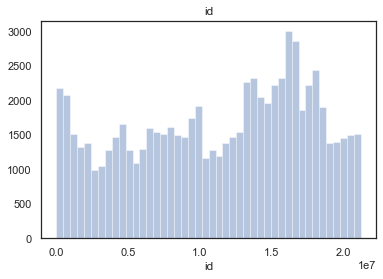

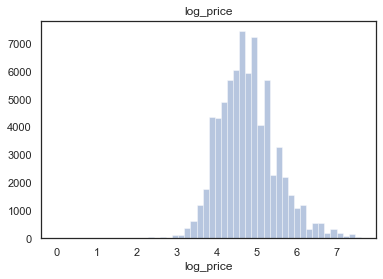

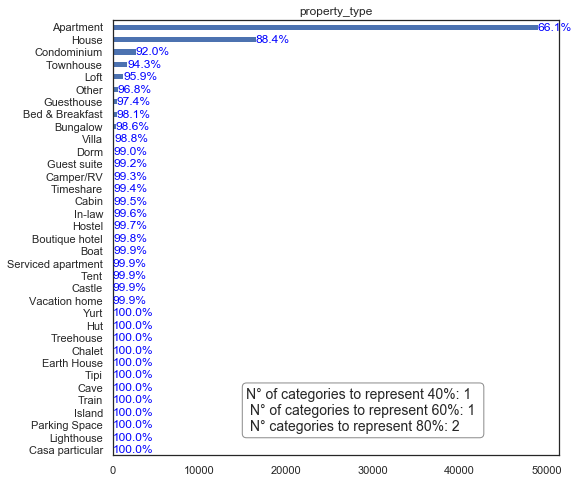

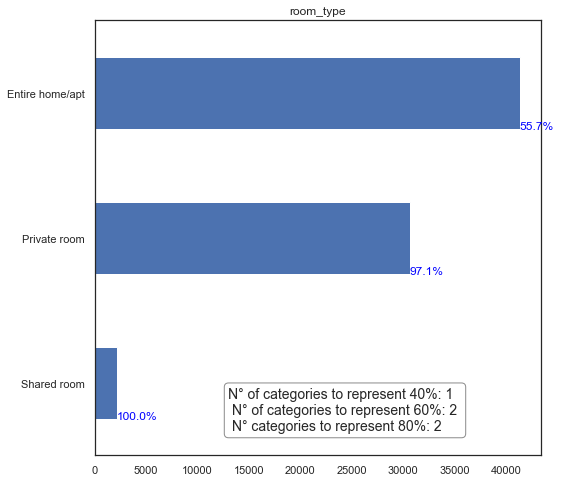

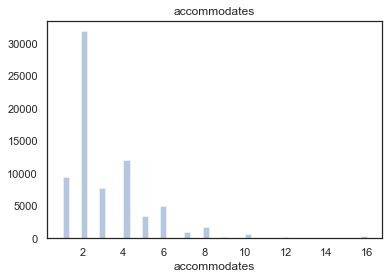

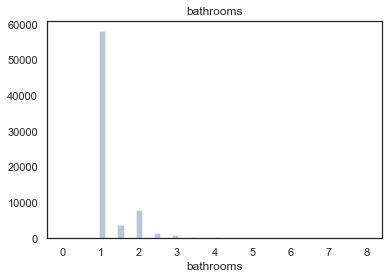

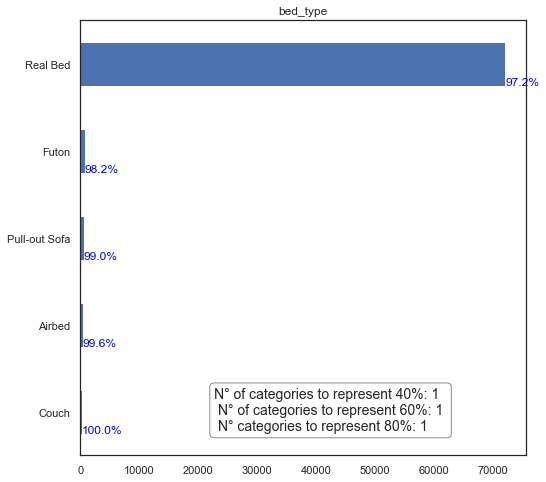

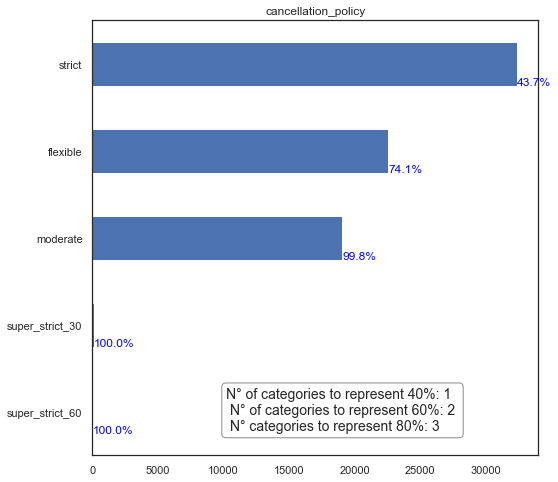

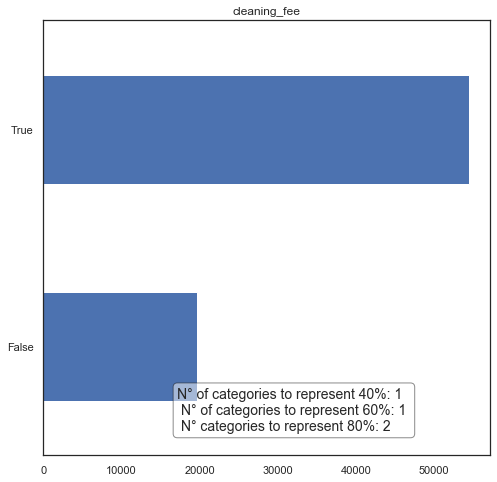

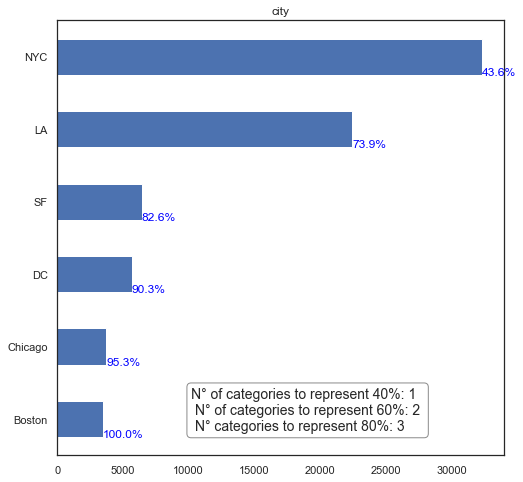

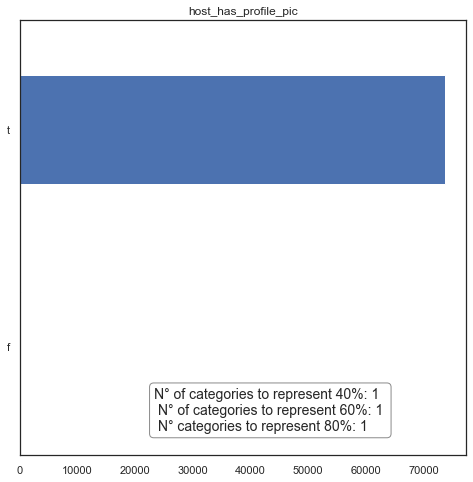

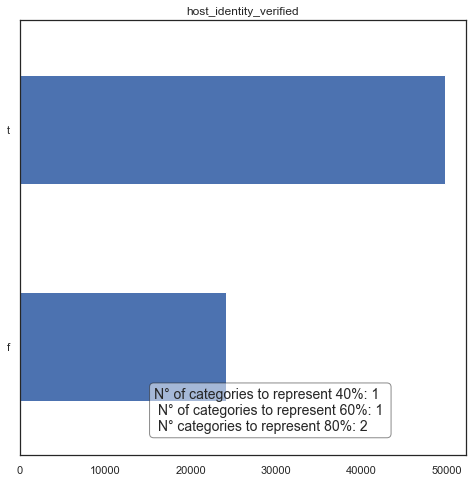

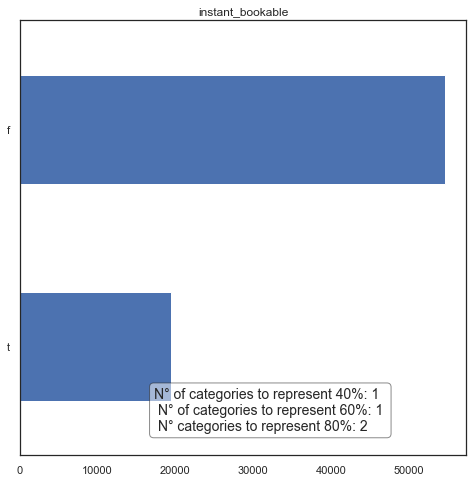

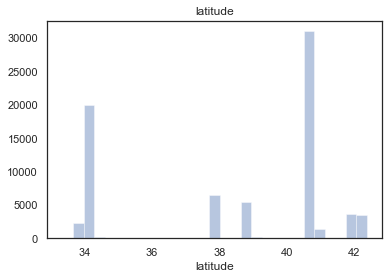

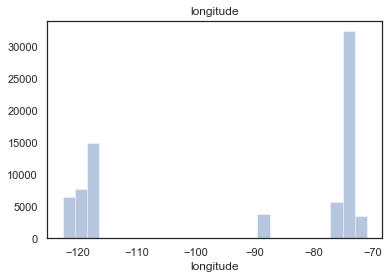

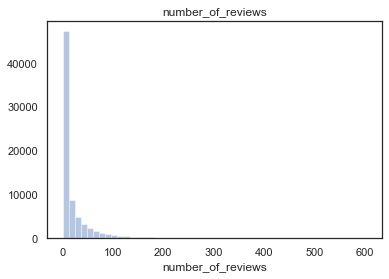

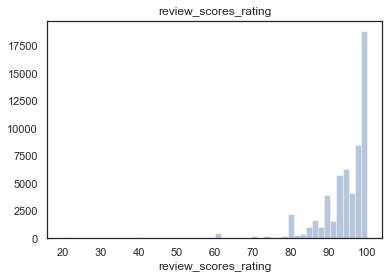

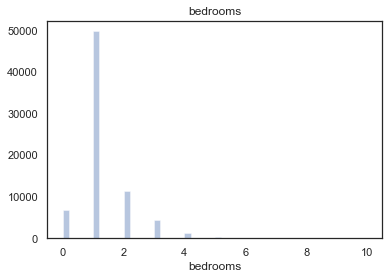

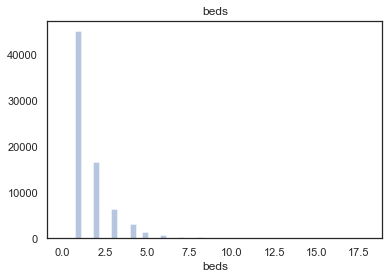

In [204]:
d.freq_analysis(df, cols = cols)

### Outliers for numerical columns

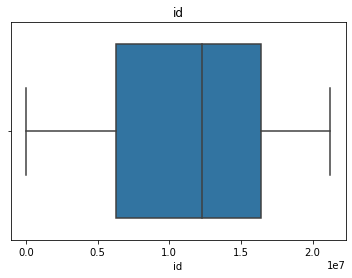

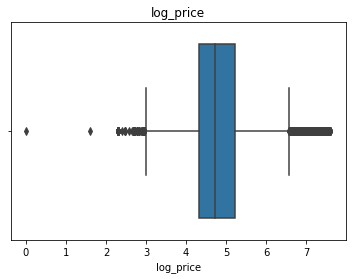

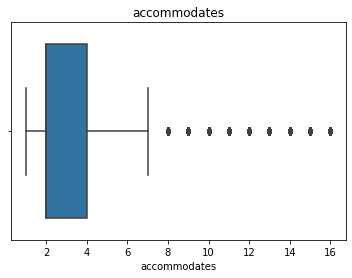

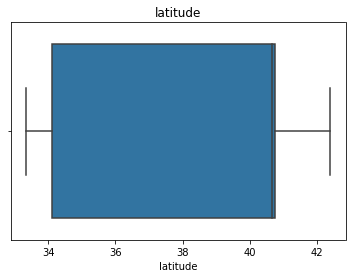

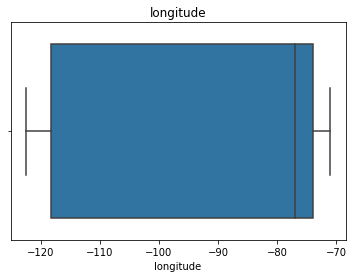

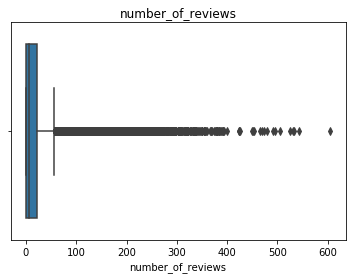

In [7]:
d.outlier_analysis(df)

<br>
<br>
<br>
<br>

# Basic operations on dataframe before analysis

### Keep only top X frequent categorys

In [8]:
categorical_columns = []

df = u.keep_top_x_categories(df, cols = categorical_columns, keep = 5)
display(df.head(5))

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.0106,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0000,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.6965,-73.9916,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0000,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0000,1.0000
1,6304928,5.1299,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0000,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.7661,-73.9890,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0000,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0000,3.0000
2,7919400,4.9767,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0000,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.8081,-73.9438,The Garden Oasis,Harlem,10,92.0000,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0000,3.0000
3,13418779,6.6201,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0000,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.7720,-122.4316,Beautiful Flat in the Heart of SF!,Lower Haight,0,nan,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0000,2.0000
4,3808709,4.7449,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0000,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.9256,-77.0346,Great studio in midtown DC,Columbia Heights,4,40.0000,NaN,20009,0.0000,1.0000


### One-hot encode categorical variables

In [9]:
categorical_columns = [] # Complete with list categorical columns you want to one-hot encode.

df = u.encode_categories(df, cols = categorical_columns, max_nunique = 5)
display(df.head(5))

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.0106,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0000,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.6965,-73.9916,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0000,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0000,1.0000
1,6304928,5.1299,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0000,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.7661,-73.9890,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0000,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0000,3.0000
2,7919400,4.9767,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0000,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.8081,-73.9438,The Garden Oasis,Harlem,10,92.0000,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0000,3.0000
3,13418779,6.6201,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0000,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.7720,-122.4316,Beautiful Flat in the Heart of SF!,Lower Haight,0,nan,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0000,2.0000
4,3808709,4.7449,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0000,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.9256,-77.0346,Great studio in midtown DC,Columbia Heights,4,40.0000,NaN,20009,0.0000,1.0000


<br>
<br>
<br>

# Systematic correlation/PCA analysis

### Correlation plot

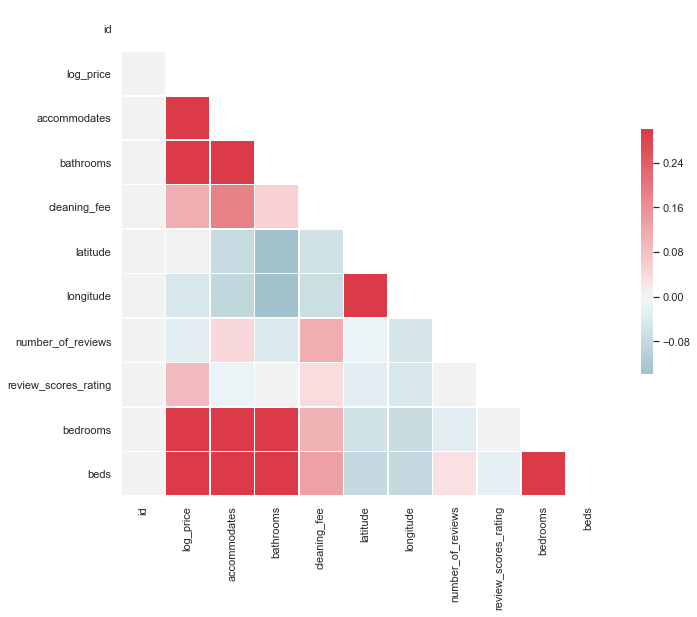

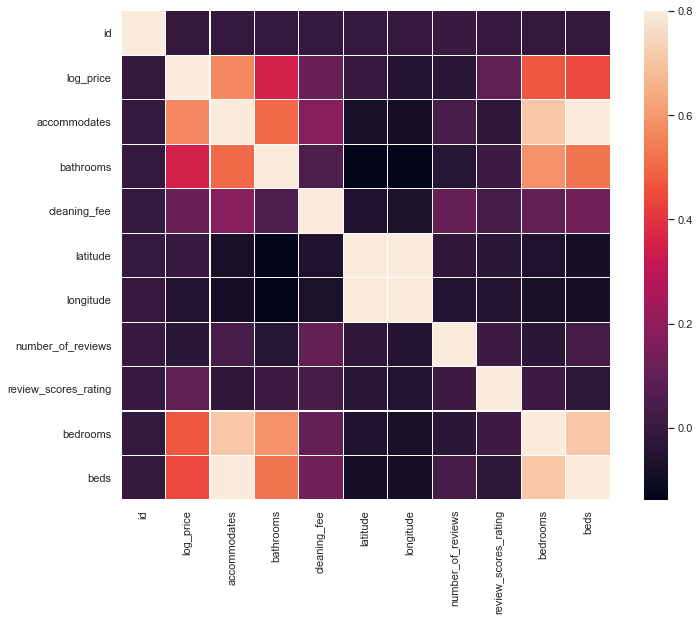

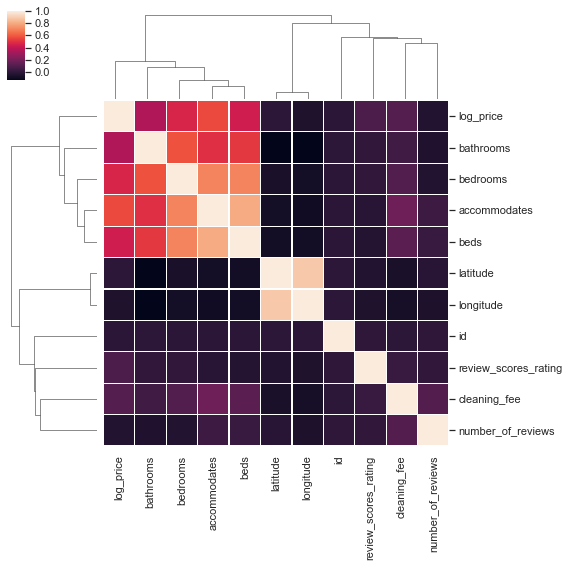

In [10]:
d.correlation_analysis(df, cols = cols)

### Sparce inverse covariance matrix

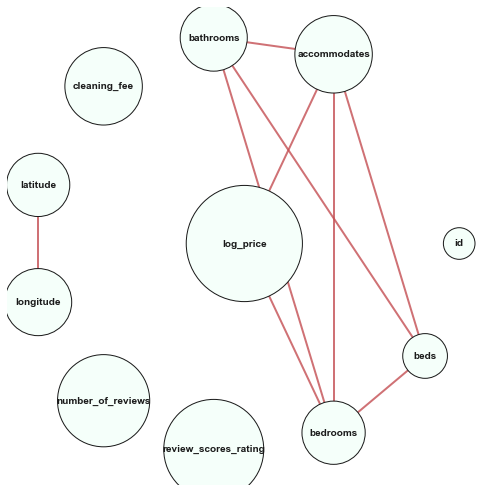

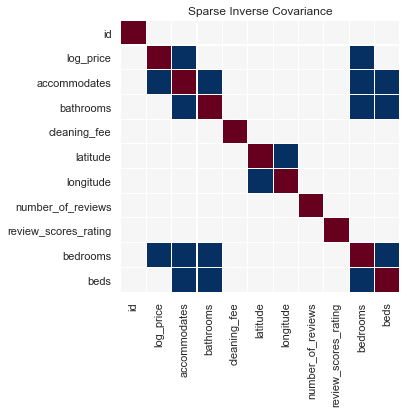

,id,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
id,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
log_price,0.0000,1.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,0.0000
accommodates,0.0000,-1.0000,1.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,-1.0000
bathrooms,0.0000,0.0000,-1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,-1.0000
cleaning_fee,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
latitude,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,-1.0000,0.0000,0.0000,0.0000,0.0000
longitude,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,1.0000,0.0000,0.0000,0.0000,0.0000
number_of_reviews,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
review_scores_rating,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
bedrooms,0.0000,-1.0000,-1.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,-1.0000


In [11]:
f = FactorAnalyzer()
f.sparce_invcov(df, cols = None, style = "GraphLassoCV", param = 0.3, layout = "circular", center = 'log_price')

### PCA

Explained variation per principal component: [0.34945455 0.20424865 0.15749297 0.08763815 0.06788941 0.05413396
 0.03462126 0.01778692 0.01521104 0.0115231 ]
Explained total variation: 1.0


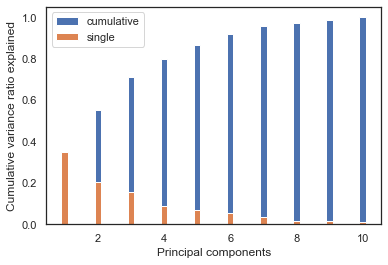

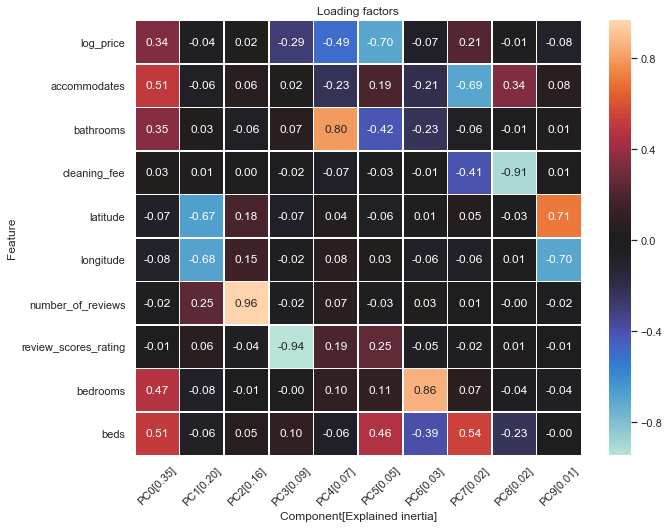

{'results':             0       1       2       3       4       5       6       7       8       9
 0      2.3254 -1.5067 -0.2586  0.0734 -0.8162  0.7629  1.0069 -0.4899  0.1034 -0.0747
 1      0.6668 -1.2511 -0.1948  0.2352 -0.7599  0.4370 -0.7947 -0.0571 -0.1250 -0.0164
 2     -0.8559  1.1648 -1.1330 -0.5936  0.0019  0.2018  0.2343 -0.0389 -0.1869  0.8005
 3     -0.6182  1.8028 -1.1191  0.1800 -0.4315 -0.2919  0.2227  0.0150 -0.1700 -0.2202
 4     -0.7625  2.1536  2.8616 -0.7140  0.0233 -0.2929  0.3479  0.1059 -0.2032  0.6722
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...     ...
 38497  5.8157  1.1214 -0.8544  3.1164  1.2020  2.6021 -4.0179  1.3680  0.2858  0.2017
 38498 -0.5348  1.2345 -0.5631 -0.6512 -0.4865 -0.5577  0.2014  0.1788 -0.2053  0.7185
 38499  2.3647  1.6378 -0.8686  0.4576  0.5273  0.1561 -0.3160  0.7287 -0.4741 -0.2626
 38500  0.9162 -1.0594  0.5858 -0.2097 -0.6468 -0.0018  0.5223 -0.3295  0.0168 -0.1388
 38501  0.1744  3.0560  3.9450 -

In [12]:
f = FactorAnalyzer()
f.pca(10,df, excluded_cols = ['id'], color_label = None)

<br>
<br>
<br>

# In depth analysis for a pair of variables

### Distribution of a continuous variable within category

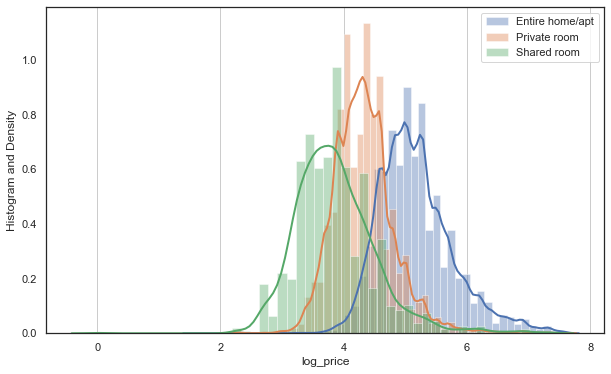

In [236]:
d.distribution_plot(df, plot_variable = 'log_price', category_variable = 'room_type', hist = True, kde = True)

### Count/Min/Max/Mean of a continuous variable per category

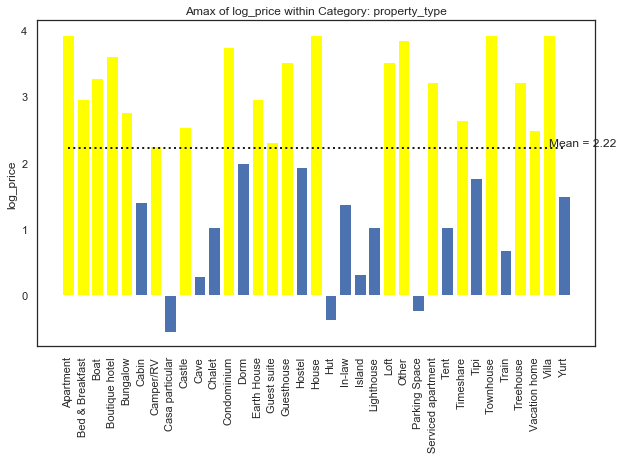

In [15]:
d.categorical_plot(df, category = 'property_type', func = np.max, value = 'log_price')

### Distribution of a categorical variable, distinct by another category

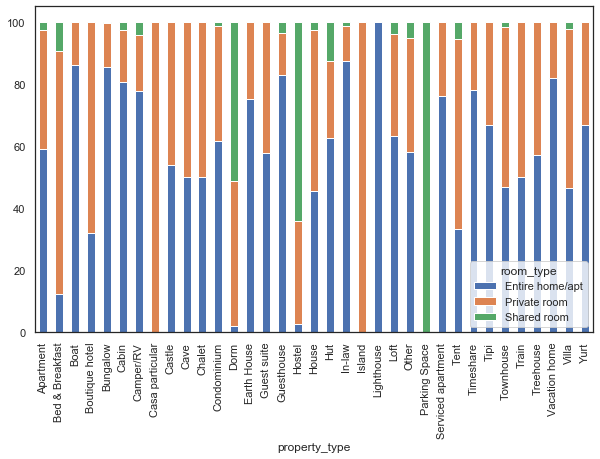

In [240]:
d.categorical_stack_bar(df, x_cat_name = 'property_type', y_cat_name = 'room_type', percentage = True)

### Joint plot for numerical variables

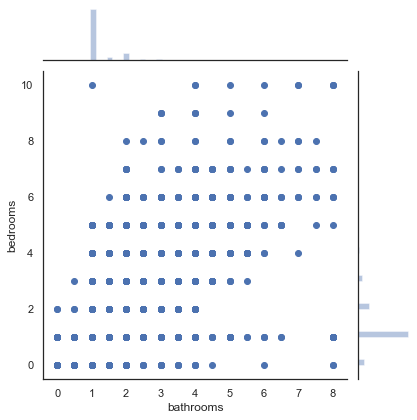

In [248]:
sns.jointplot("bathrooms","bedrooms",df)

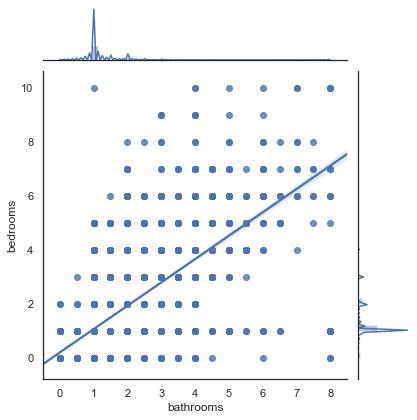

In [249]:
sns.jointplot("bathrooms","bedrooms",df, kind = 'reg')

### Correlation of X numerical, grouped by 1 categorical

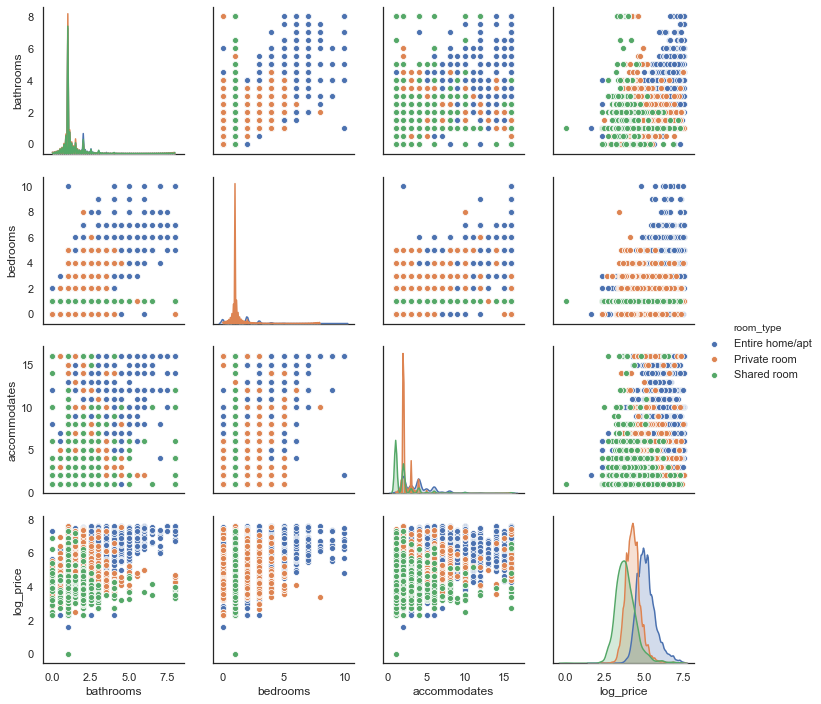

In [259]:
numerical_cols = ['bathrooms','bedrooms','accommodates','log_price']
color_col = 'room_type'

sns.pairplot(data = df[['bathrooms', 'bedrooms', 'accommodates', 'log_price', 'room_type']], hue = color_col)

### Distribution of 1 numerical grouped by 2 categorical

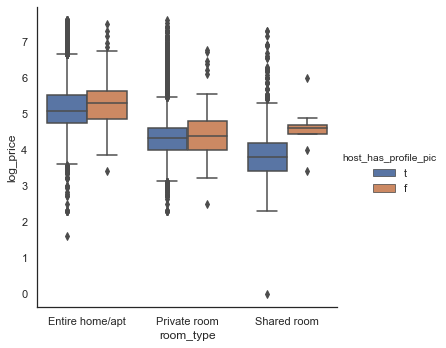

In [273]:
category_col = "room_type" # Category with few different elements
numerical_col = "log_price"
color_col = "host_has_profile_pic" # Category with  few different elements

sns.factorplot(category_col, numerical_col,color_col,data=df,kind="box")

<br>
<br>

# Datetime analysis

In [16]:
date_col = "OCCURRED_ON_DATE" # Specify the column with dates

In [17]:
d.datetime_analysis(df, colname = date_col)

KeyError: "None of [Index(['OCCURRED_ON_DATE'], dtype='object')] are in the [columns]"